# **Training a Perceptron to Implement an AND Gate**


## PY599 (Fall 2018): Applied Artificial Intelligence
## NC State University
###Dr. Behnam Kia
### https://appliedai.wordpress.ncsu.edu/


**Disclaimer**: Please note that these codes are simplified version of the algorithms, and they may not give the best, or expected performance that you could possibly get from these algorithms. The aim of this notebook is to help you understand the basics and the essence of these algorithms, and experiment with them. These basic codes are not deployment-ready or free-of-errors for real-world applications. To learn more about these algorithms please refer to text books that specifically study these algorithms, or contact me. - Behnam Kia



## Synthetic Data Preparation

[0 0 0 1]


Text(0.5,1,'AND function. Reds are zero, and blues are 1')

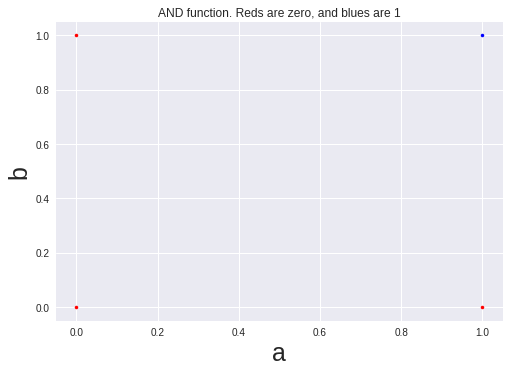

In [ ]:
import numpy as np                   #this is our old friend, the handy NumPy
import matplotlib.pyplot as plt      # matplotlib takes cares of ploting   
fig, ax = plt.subplots()


def AND(a,b):
 
  return a&b

      
training_size=4      
# we create a synthetic data set      
x_train = np.array([[0,0],[0,1],[1,0],[1,1]])
y_train = np.zeros((1,4))

y_train=AND(x_train[:,0],x_train[:,1])


print(y_train)

for xx in x_train:
  if (AND(xx[0],xx[1])==1):
    ax.plot(xx[0],xx[1],'b.')
  else:
    ax.plot(xx[0],xx[1],'r.')

plt.xlabel("a", fontsize=25)
plt.ylabel("b", fontsize=25)
plt.title('AND function. Reds are zero, and blues are 1')



In [ ]:
def LogisticRegression(W,x):
  y = x.dot(W)
  return sigmoid(y)


def sigmoid(y):
  return 1/(1+np.exp(-y))



def DecisionBoundary(p):   
  k=len(p)
  result=np.zeros((k,1))
  for i in range(k):        #Ideally I should have implemented in a vectorized format (instead of looping)for faster execution!
    if(p[i]>0.5):
      result[i]=1
    else:
      result[i]=0
  return result    

  
def CrossEntropy(y_hat,y):   # the cost function. y_hat is what the model predicts, y is the actual lables of the trainign data.
  return 1/np.size(y_hat)*(y.T.dot(np.log(y_hat)) - (1-y).T.dot((np.log(1-y_hat))))
  

  



## Logistic Regression

Epoch 1/50
loss:  [[7.81704482]] - acc: 0.25
Epoch 2/50
loss:  [[7.12966876]] - acc: 0.25
Epoch 3/50
loss:  [[6.44246083]] - acc: 0.25
Epoch 4/50
loss:  [[5.7556591]] - acc: 0.25
Epoch 5/50
loss:  [[5.06985121]] - acc: 0.25
Epoch 6/50
loss:  [[4.38649587]] - acc: 0.25
Epoch 7/50
loss:  [[3.70918722]] - acc: 0.25
Epoch 8/50
loss:  [[3.04644382]] - acc: 0.25
Epoch 9/50
loss:  [[2.41629467]] - acc: 0.25
Epoch 10/50
loss:  [[1.84787741]] - acc: 0.25
Epoch 11/50
loss:  [[1.3684655]] - acc: 0.5
Epoch 12/50
loss:  [[0.98654294]] - acc: 0.5
Epoch 13/50
loss:  [[0.69793617]] - acc: 0.5
Epoch 14/50
loss:  [[0.49138723]] - acc: 0.25
Epoch 15/50
loss:  [[0.34886921]] - acc: 0.5
Epoch 16/50
loss:  [[0.25223689]] - acc: 0.5
Epoch 17/50
loss:  [[0.1872398]] - acc: 0.5
Epoch 18/50
loss:  [[0.14371482]] - acc: 0.5
Epoch 19/50
loss:  [[0.1146531]] - acc: 0.5
Epoch 20/50
loss:  [[0.09527652]] - acc: 0.5
Epoch 21/50
loss:  [[0.08234448]] - acc: 0.5
Epoch 22/50
loss:  [[0.07366963]] - acc: 0.5
Epoch 23/50


Text(1.2,2,'Decision Boundry')

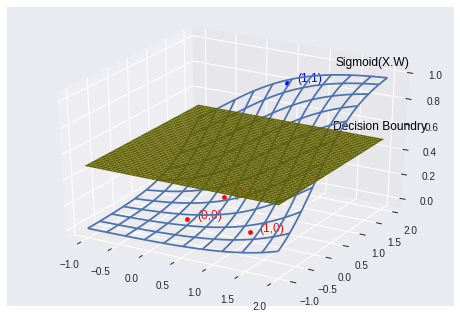

In [ ]:

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np






x_trainp=np.c_[np.ones((int(training_size))),x_train]  #padding x_train with ones

y_train = np.reshape(y_train,(np.size(y_train),1))




alpha = 1
n_iterations = 50
m = training_size  


np.random.seed(seed=80)
W = 5*np.random.randn(3,1) # we start from a randomly initialzied set of parameters for Logistic Regression


Wtrajectory=np.array(W)



for iteration in range(n_iterations):   # that would be better if we were checking the amount of improvement in the cost function 
                                        # (CrossEntropy) at each iteration. IF it falls below a small threshold value, meaning
                                        #that we are not improving the classifer by further iterations, we should stop further iterations
                                        # of Gradient Descent. Here in this problem we just eyeballing the cost function and 
                                        # we already know it will learn the perfect AND gate with n_iterations iterations.
          
          
    gradients = 1/m * x_trainp.T.dot(sigmoid(x_trainp.dot(W)) - y_train) #this is pretty much similiar to gradient in Linear Regression.
                                                                         #but y_hat has a different definition (the  sigmoid output function).
    W = W - alpha * gradients   # learning algorithm, we follow the gradient. 
    Wtrajectory=np.hstack((Wtrajectory,W))
    
    
    y_hat = LogisticRegression(W,x_trainp) # this returns back y_hat=P(y=1|x)
    
    
    
    
    CE = CrossEntropy(y_hat,y_train)  
    
    
    Binary_result=DecisionBoundary(y_hat)   # we make a binary decision on whether the output is 0 or 1 based on y_hat=P(y=1|x)
    
    
    num_correct_predition=np.sum(y_train == Binary_result)

 
    print("Epoch %d/%d"%(iteration+1,n_iterations))  #here we are printing readable outputs to track the performance of the optimization as GD iterates
    print("loss:  %s - acc: %s"%(CE,num_correct_predition/len(y_train))) 
  
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')



#======================= This part of code is developed by Elliot Pahel-Short 
densityOfMesh=50
xx=np.linspace(-1,2,densityOfMesh)
yy=np.linspace(-1,2,densityOfMesh)
X, Y = np.meshgrid(xx, yy)

X = np.reshape(X,((np.size(xx)*np.size(xx))))
Y = np.reshape(Y,((np.size(yy)*np.size(yy))))


s = np.size(xx)**2
xySpacep = np.zeros((s,3))
xySpacep[:,0] = np.ones(np.size(xx)*(np.size(xx)))
xySpacep[:,1] = X
xySpacep[:,2] = Y



LR = LogisticRegression(W,xySpacep)


X = np.reshape(X,((np.size(xx),np.size(xx))))
Y = np.reshape(Y,((np.size(yy),np.size(yy))))
LR = np.reshape(LR,((np.size(yy),np.size(yy))))

#=================================================================

for xx in x_train:
  if (AND(xx[0],xx[1])==1):
    ax.scatter(xx[0],xx[1],AND(xx[0],xx[1]),c='b')
  else:
    ax.scatter(xx[0],xx[1],AND(xx[0],xx[1]),c='r')
    
ax.plot_wireframe(X, Y, LR, rstride=5, cstride=5)
    
  
DB=np.full((50, 50), 0.5)



ax.plot_surface(X, Y, DB, color='y')




ax.text(1+0.1, 1+0.1, 1, "(1,1)",color="b")
ax.text(0+0.1, 0+0.1, 0, "(0,0)",color="r")
ax.text(1+0.1, 0+0.1, 0, "(1,0)",color="r")
ax.text(0+0.1, 1+0.1, 0, "(0,1)",color="r")
ax.text(1.2, 2, 1, "Sigmoid(X.W)",color="k")
ax.text(1.2, 2, 0.5, "Decision Boundry",color="k")


Text(2,-0.5,'Desicion Boundry learned by Logistic Regression (Perceptron)')

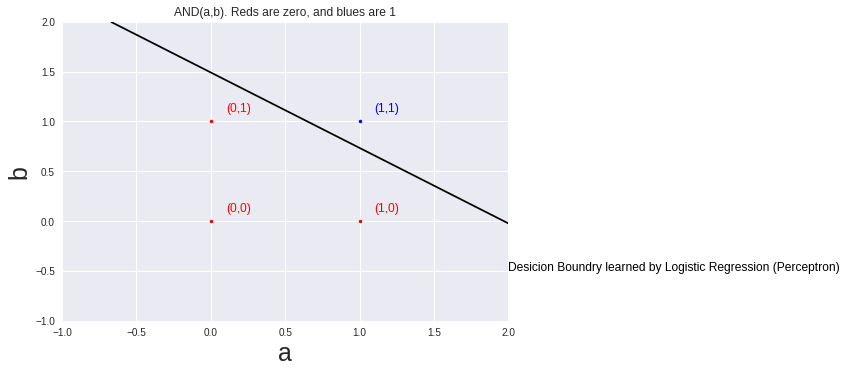

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

for xx in x_train:
  if (AND(xx[0],xx[1])==1):
    ax.plot(xx[0],xx[1],'.b')
  else:
    ax.plot(xx[0],xx[1],'.r')
    
    
  
DB=np.full((50, 50), 0.5)





ax.text(1+0.1, 1+0.1, "(1,1)",color="b")
ax.text(0+0.1, 0+0.1, "(0,0)",color="r")
ax.text(1+0.1, 0+0.1, "(1,0)",color="r")
ax.text(0+0.1, 1+0.1, "(0,1)",color="r")






ax.contour(X, Y, LR - DB, levels = [0], colors='k')


plt.xlabel("a", fontsize=25)
plt.ylabel("b", fontsize=25)
plt.title('AND(a,b). Reds are zero, and blues are 1')

ax.text(2, -0.5, "Desicion Boundry learned by Logistic Regression (Perceptron)",color="k")

